(404, 13)
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
226   0.38214   0.0   6.20     0  0.504  8.040   86.5  3.2157    8  307.0   
292   0.03615  80.0   4.95     0  0.411  6.630   23.4  5.1167    4  245.0   
90    0.04684   0.0   3.41     0  0.489  6.417   66.1  3.0923    2  270.0   
373  11.10810   0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666.0   
273   0.22188  20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223.0   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
349   0.02899  40.0   1.25     0  0.429  6.939   34.5  8.7921    1  335.0   
212   0.21719   0.0  10.59     1  0.489  5.807   53.8  3.6526    4  277.0   
156   2.44668   0.0  19.58     0  0.871  5.272   94.0  1.7364    5  403.0   
480   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666.0   
248   0.16439  22.0   5.86     0  0.431  6.433   49.1  7.8265    7  330.0   

     PIRATIO       B  LSTAT  
226     17.4  387.38   3.13  
292  

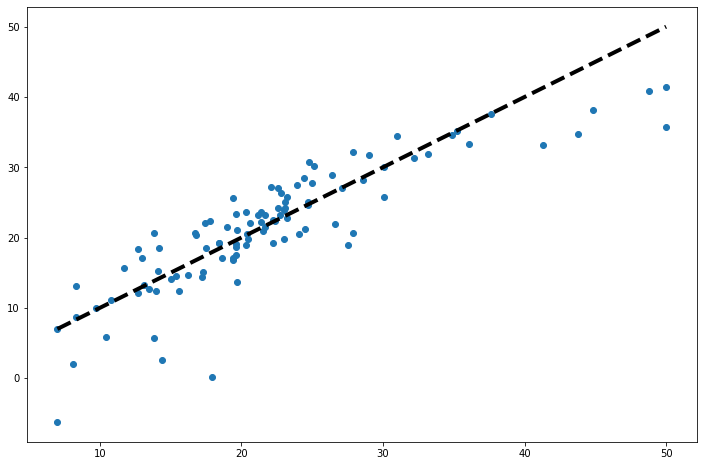

In [15]:
#线性回归的房价预测
'''
CRIM,犯罪率
ZN,占地面积超过2.5万平方英尺（约2300平方米）的住宅用地比例
INDUS,城镇非零售业务地区比例
CHAS,查尔斯河 离散变量
NOX,一氧化氮浓度 每一千万份
RM,平均每居民房数
AGE,1940年之前建成的所有者占用单位的比例
DIS,距离就业中心的加权距离
RAD,辐射状公路的可达性指数
TAX,每10，000美元的全额物业税率
PIRATIO,城镇师生比例
B,黑人比率
LSTAT,人口中地位较低人群的百分比
MEDV以1000美元计算的自有房屋的中位数价格
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

data=pd.read_csv(r'C:\Users\HP\Desktop\codes\pys\Machine Learning\boston_house\housing.csv')
# print(data.head())
# print(data)
# print(data.info())
# print(data.isna().sum()) #缺失值统计
#plt.figure(figsize=(12,8))
# print(data.corr())#计算相关系数，
'''
数据类型为object，使用data.corr()计算相关系数返回的值为空
'''
# 其他统计：mode众数，count非NaN个数
# print(data.cov())#协方差 median\mean\max\min\std\cov\var(方差)
#热图 annot annot是否显示数值
fig=plt.figure(figsize=(12,8))
# sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Oranges')
#sns.pairplot(data,kind='scatter',diag_kind='hist') #kind类型 diag_kind对角线类型
'''
cmap： 主题色
Accent, Accent_r, Blues, Blues_r, BrBG, 
BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, 
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, 
Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, 
Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, 
PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, 
Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, 
RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, 
YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, 
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, 
bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, 
coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, 
flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, 
gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, 
plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, 
rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, 
tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, twilight, twilight_r, twilight_shifted, 
twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
'''

#相关性排序
sort00=data.corr()['MEDV'].sort_values()
# print(sort00)
# hue：根据hue指定的字段的值区分颜色，palette：配色方案
# sns.pairplot(data[["LSTAT","RM","PIRATIO","MEDV"]],diag_kind='hist',hue="MEDV",palette='husl')
# sns.pairplot(data[["LSTAT","RM","PIRATIO","MEDV"]])
# plt.show()

#训练集 测试集
from sklearn.model_selection import train_test_split
X ,y = data[data.columns.delete(-1)], data['MEDV'] #X前十三列y最后一列先分离数据因果变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#test_size:测试集的比例
#random_state类似种子，设为一个整数数字多次运行程序，随机生成两集的结果是固定的
print(X_train.shape)
print(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()#最小二乘法线性回归
linear_model.fit(X_train, y_train)#fit方法拟合曲线 训练
# def Model():
#     model = linear_model.LinearRegression()
#     return model
# def train(model,x,y):
#     model.fit(x,y)
# linear_model=Model()
# train(linear_model,X_train,y_train)
coef = np.array(linear_model.coef_)#回归系数
line_pre = linear_model.predict(X_test) #预测 ->line_pre是预测出来的y_test
# #注意！ X是test集中的属性，y是test集中的标签而不是预测出的结果
print('SCORE:{:.4f}'.format(linear_model.score(X_test, y_test)))
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line_pre))))#均方差
#np.set_printoptions(suppress=True)#取消科学计数法
#print(np.around(coef,decimals=4))# 注意位数问题
df_coef = pd.DataFrame()
df_coef['Title'] = data.columns.delete(-1)
df_coef['Coef'] = coef
print(df_coef)
line_pre = linear_model.predict(X)
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y

# hos_pre.plot(figsize=(18,8))
# plt.show()
# random_state 最小二乘法得分0.7左右
line_pre = linear_model.predict(X_test)
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')

上一个段代码复制自 同文件夹中main.py 为在pycharm中运行有大量代码功能未展示，在下方演示

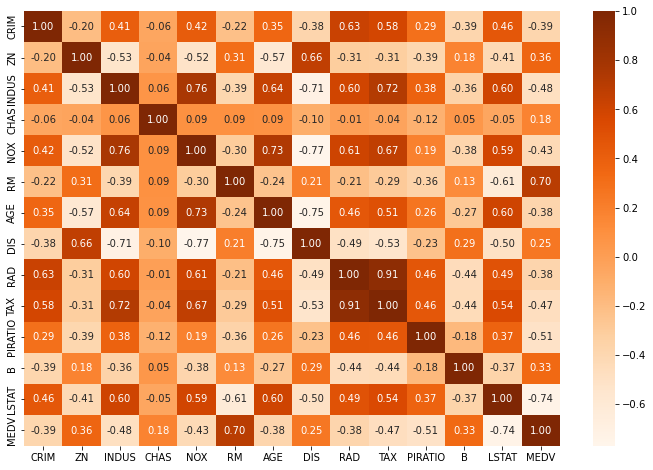

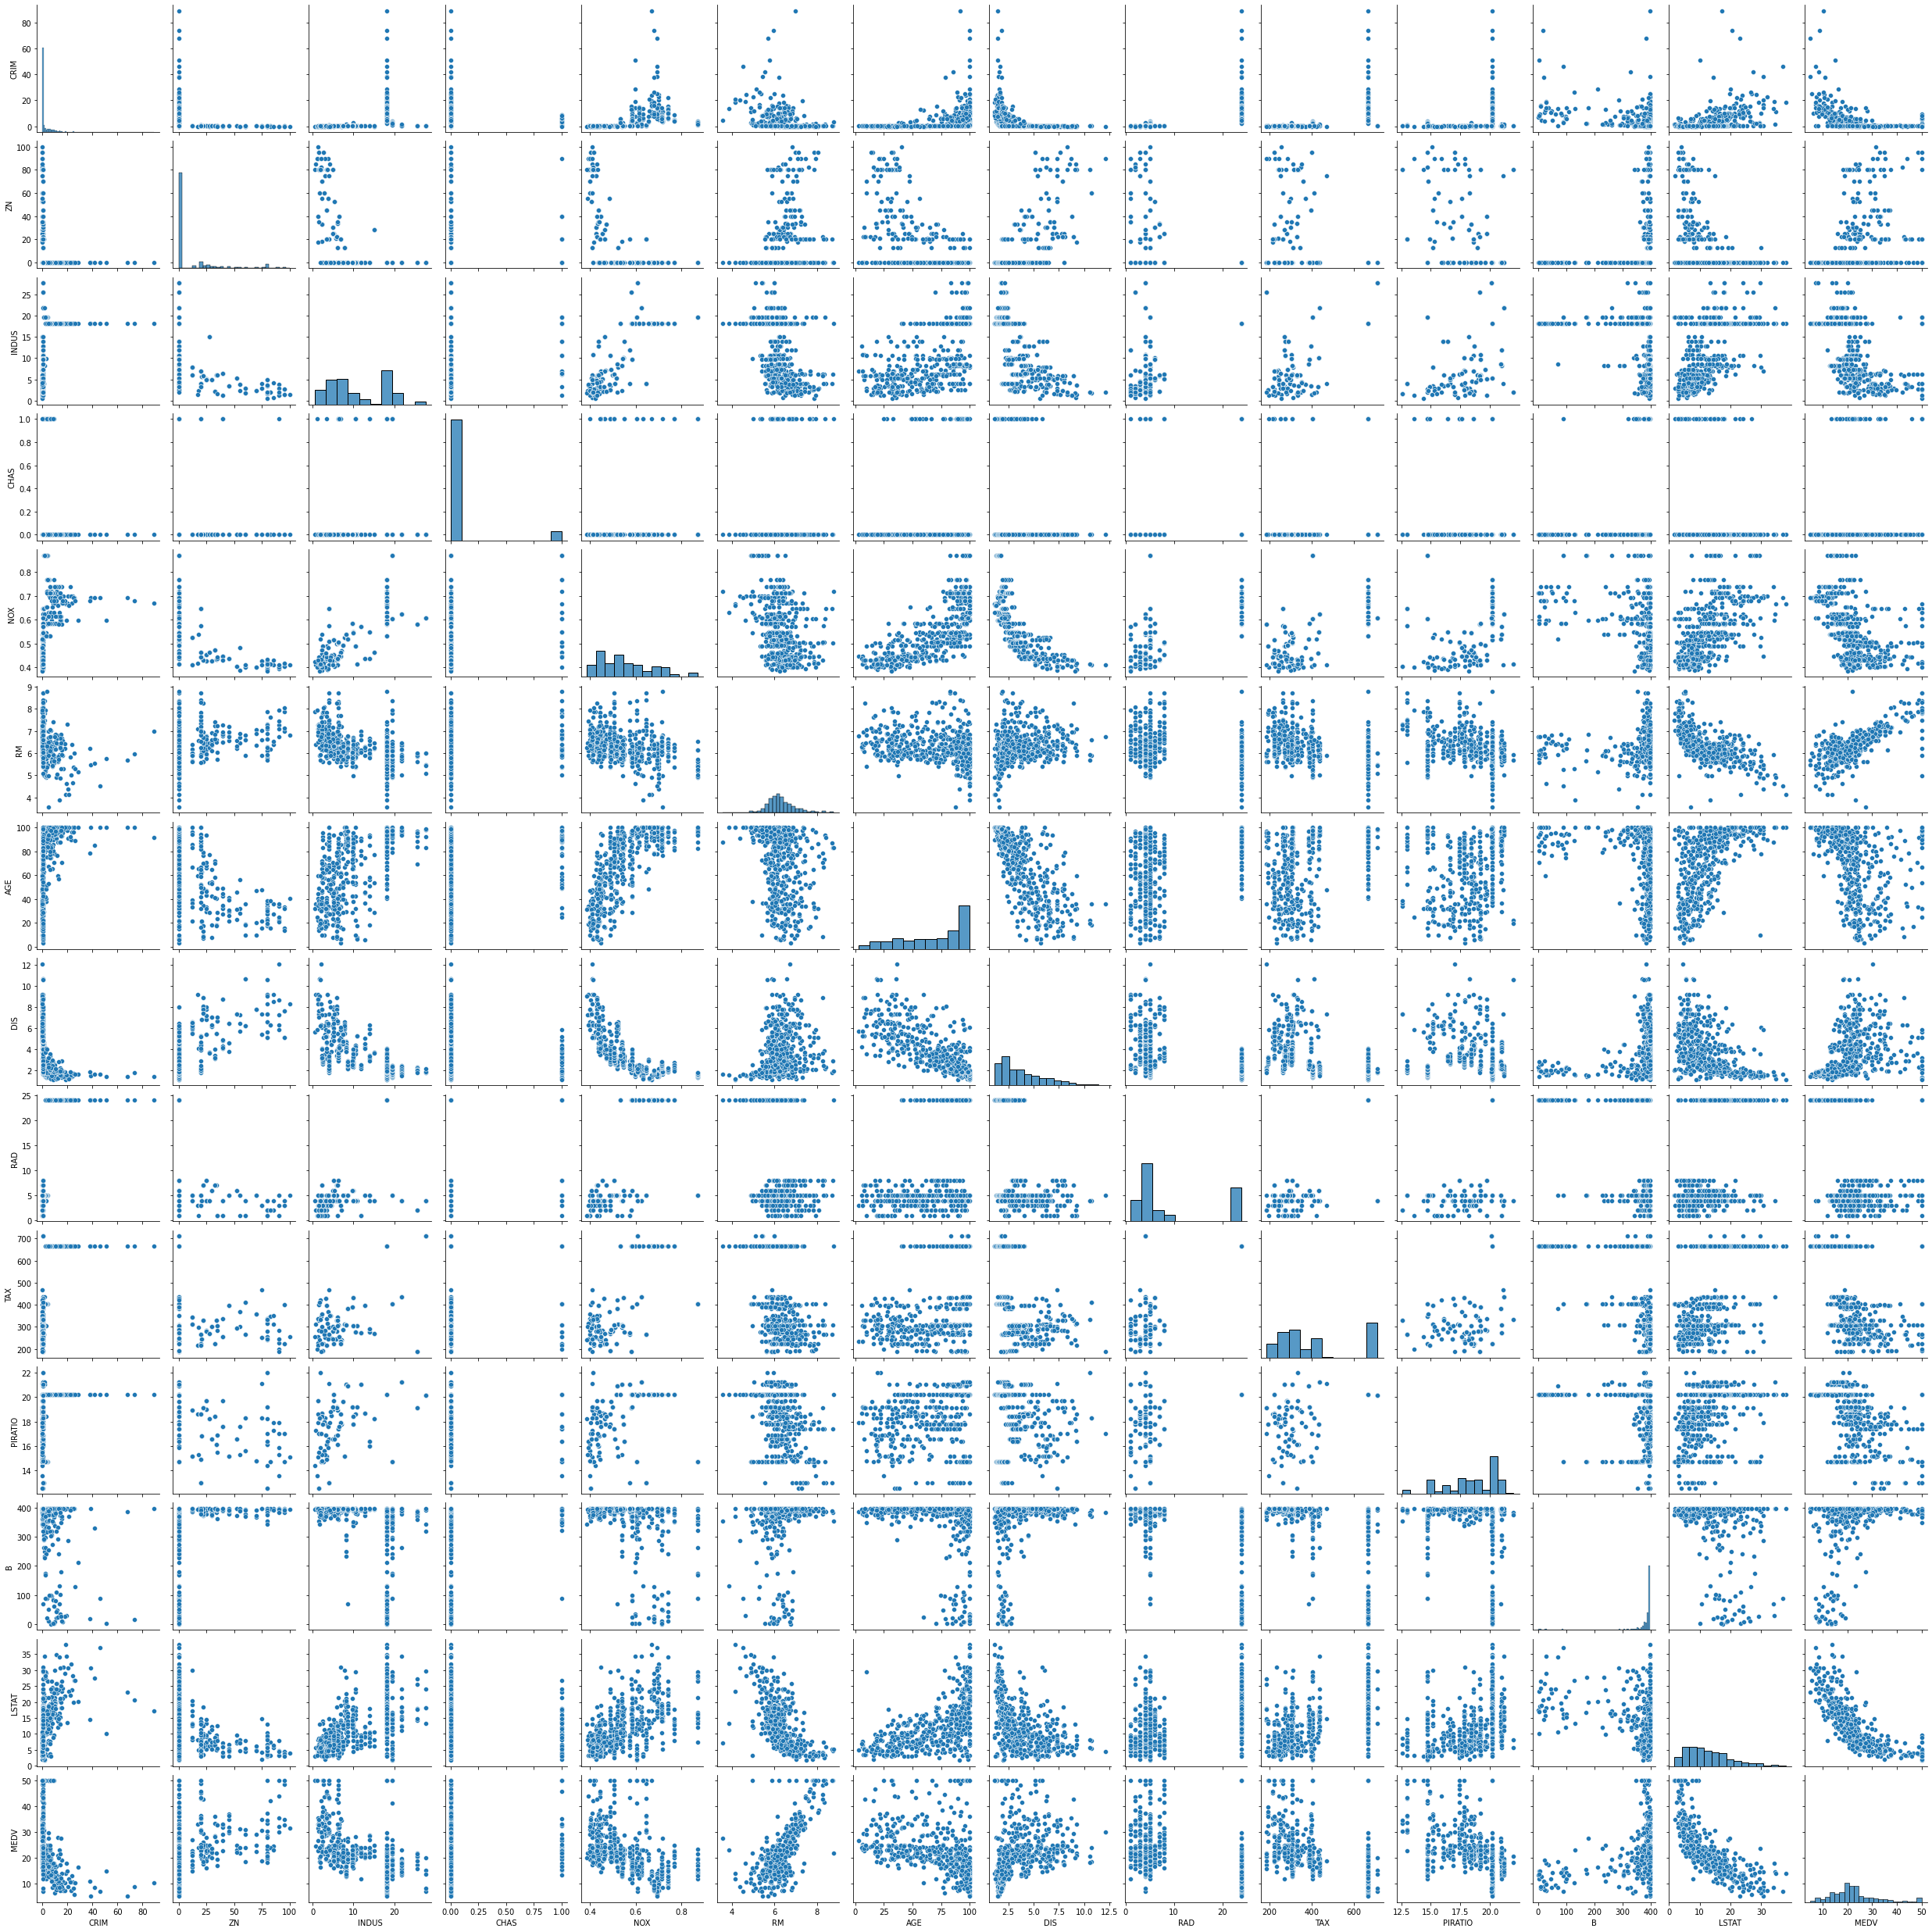

In [16]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Oranges')
sns.pairplot(data,kind='scatter',diag_kind='hist') #kind类型 diag_kind对角线类型

<AxesSubplot:>

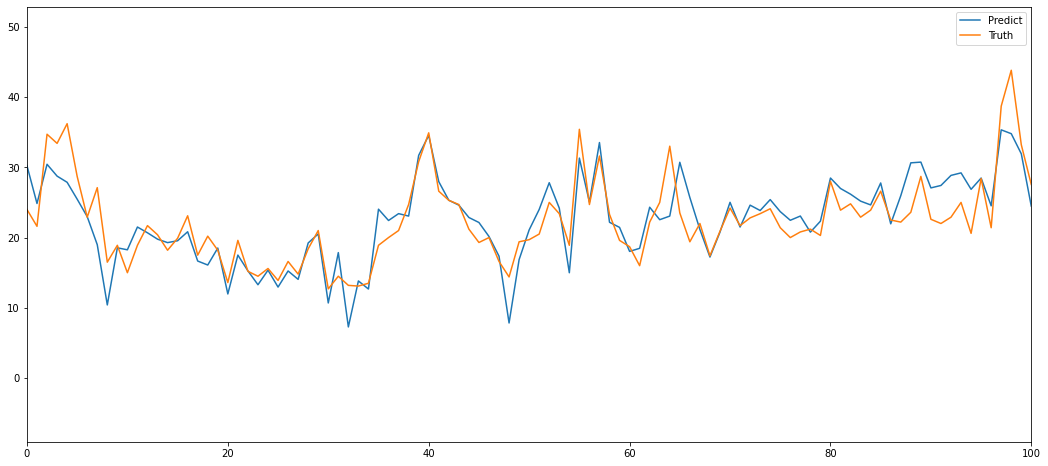

In [17]:
line_pre = linear_model.predict(X)
hos_pre = pd.DataFrame()
hos_pre['Predict'] = line_pre
hos_pre['Truth'] = y
hos_pre.plot(figsize=(18,8),xlim=(0,100))

In [18]:
hos_pre

,Predict,Truth
0,30.230746,24.0
1,24.848412,21.6
2,30.424683,34.7
3,28.743003,33.4
4,27.863114,36.2
...,...,...
501,23.288472,22.4
502,22.377959,20.6
503,27.537085,23.9
504,26.037326,22.0


In [38]:
data.corr()['MEDV'].abs().sort_values(ascending=False).head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PIRATIO    0.507787
Name: MEDV, dtype: float64

In [44]:
X2 = np.array(data[['LSTAT','RM','PIRATIO']])
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=5,test_size=0.2)
linear_model2 = LinearRegression()
linear_model2.fit(X2_train,y_train)
print(linear_model2.intercept_)
print(linear_model2.coef_)
line2_pre = linear_model2.predict(X2_test)  #预测值
print('SCORE:{:.4f}'.format(linear_model2.score(X2_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, line2_pre))))#RMSE(标准误差)


23.68107026871482
[-0.64697098  3.9169303  -0.95483295]
SCORE:0.6916
RMSE:4.9139


In [42]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
X_train = ss_x.fit_transform(X_train)
X_test = ss_x.transform(X_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss_y.transform(y_test.values.reshape(-1, 1))

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)
tree_reg_pre = tree_reg.predict(X_test)#预测值
print('SCORE:{:.4f}'.format( tree_reg.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,tree_reg_pre))))#RMSE(标准误差)


SCORE:0.7165
RMSE:4.7115


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [47]:
from sklearn import ensemble
#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,'learning_rate': 0.01, 'loss': 'ls'}
#clf = ensemble.GradientBoostingRegressor(**params)
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train, y_train)
clf_pre=clf.predict(X_test) #预测值
print('SCORE:{:.4f}'.format(clf.score(X_test, y_test)))#模型评分
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test, clf_pre))))#RMSE(标准误差)


SCORE:0.8840
RMSE:3.0131


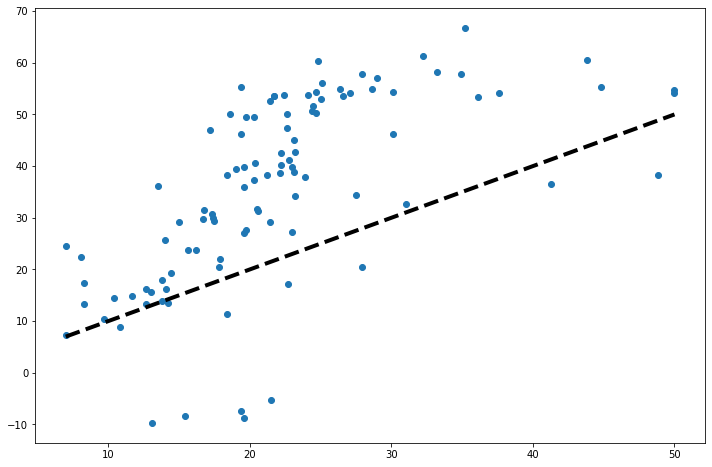

In [49]:
line_pre = linear_model.predict(X_test)
fig=plt.figure(figsize=(12,8))
plt.scatter(y_test, line_pre,label='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4,label='predicted')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'k--', lw=4,label='predicted2')